# **Synopsis: Capstone Project - NLP**

Firstly, Thanks to our mentor and study materials which has help us to understand and learn insight of basic python coding, Exploratory Data Analysis(EDA), text data pre-processing technique, machine learning algorithms, Neural Network and Sequencial Models. 

This Project scope covers deliverables as under, 

1) Understanding of data types and exploration of attributes interms of shape, size, missing values and unique values variables. Descriptive statistics of attributes and distribution pattern. Loading of dataset, converting data types to workable datatypes. 

2) Univariate Analysis: Identification of unique groups, callers and input language type contribution with respect to total dataset. Identification of outliers.

3) Bi-variate Analysis: Bi-variate analysis between the predictor variable and between the predictor variable and target variable. Inference on relationship study. Stratergies to address data popullation, outliers and missing values.

4) Text Pre-processing: 

Step1: 
Text preprocessing includes, Converted to characters to lower case, removal of hyperlinks,removal of Web link, removal of mail Id, expand text, removal of all the special characters and digits, removal of single characters, removal of extra spaces etc

Step2: Removal of stop words and tokenizion of words

5) Exploration of count based machine learning models, like Multinomial Naive Base, Decision tree, Random forest and others for attributes 'Short Description' and 'Description' seperately. 

6) Exploration of basic sequential models

**Dataset Understanding:**

To execute the above mention delivarables dataset is processed at multiple level the details of dataset with dataset name and its type of processing as under,

dataset name     type of processing

df:               Origanially provided dataset for study

df1:              Removed outliers from dataset based on uni-variate and                     bi-variate analysis outcomes  

df2:              Text preprocessing interms of removing impurity of text

df3:              Removed stopwords and tokenized word  

df4:              All the steps till df3 with only 'Description' attributes

df5:              All the steps till df3 with onnly 'Short Description'                      attributes

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Populating the interactive namespace from numpy and matplotlib


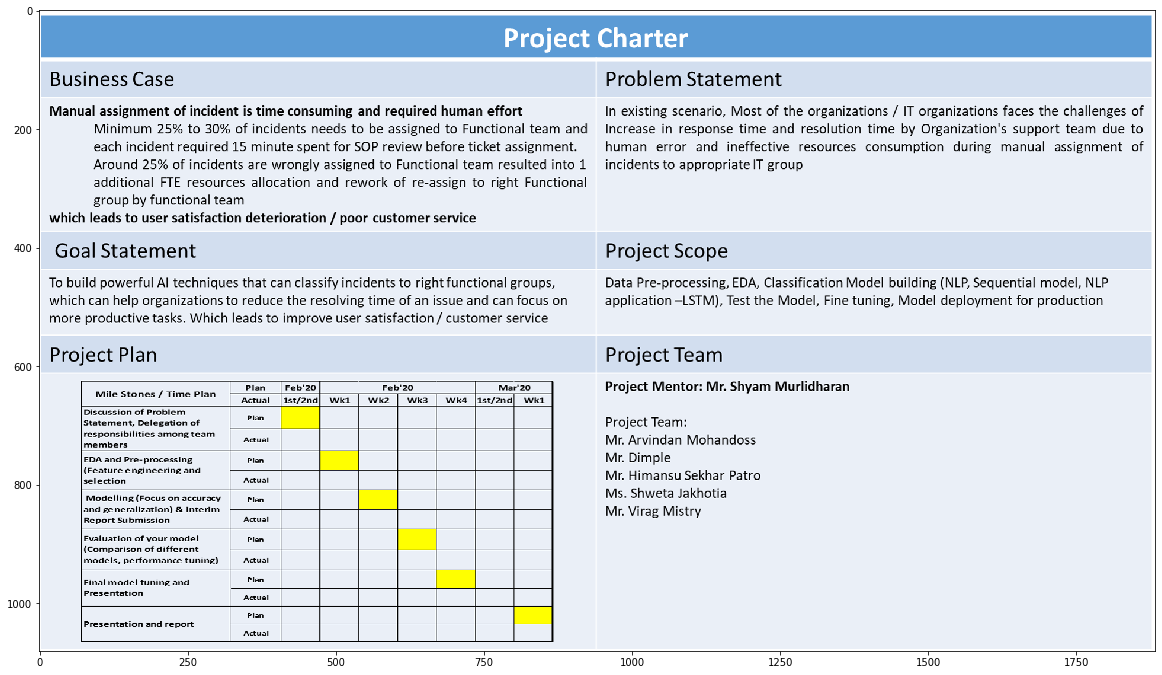

In [21]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/My Drive/Capstone Project/Business_Case.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


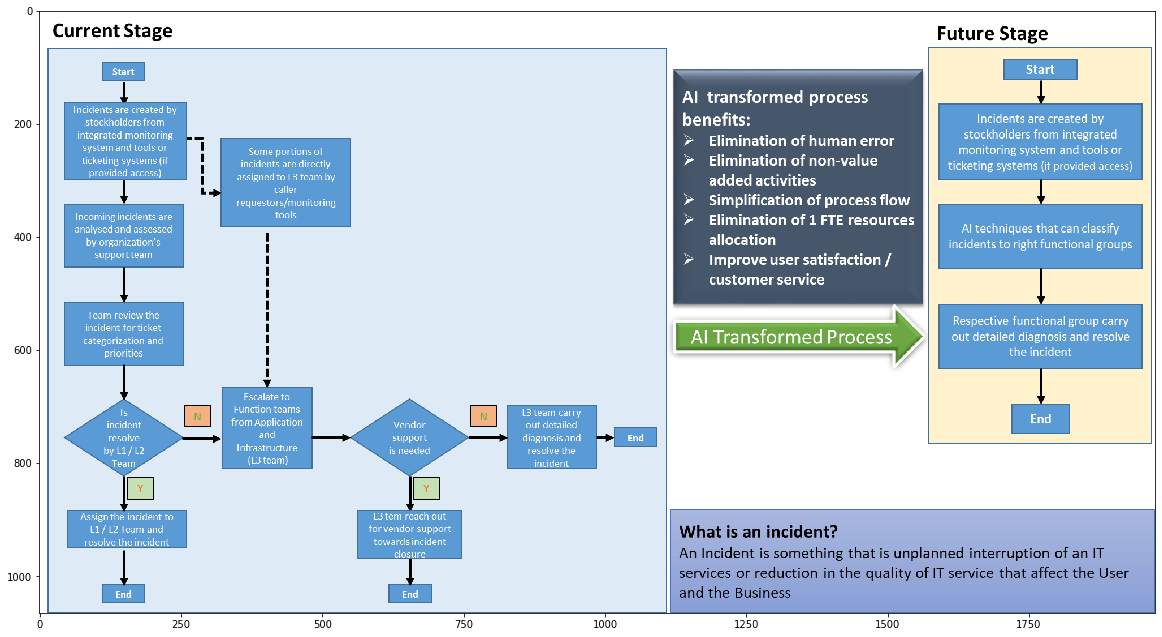

In [22]:
%pylab inline
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Capstone Project/Process_Flow.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.show()

In [23]:
!pip install contractions

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df = pd.read_excel('/content/drive/My Drive/Capstone Project/Input_Data_Final.xlsx')

In [0]:
df.to_csv('/content/drive/My Drive/Capstone Project/Input_Data_Final.csv')

In [0]:
df = pd.read_csv('/content/drive/My Drive/Capstone Project/Input_Data_Final.csv',encoding='latin-1')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [28]:
df.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [29]:
print(df.shape)
print(df.size)
print(df.info())

(8500, 7)
59500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 7 columns):
Short description        8492 non-null object
Description              8499 non-null object
Caller                   8500 non-null object
Assignment group         8500 non-null object
Cat_Short_Description    8500 non-null object
Cat_Description          8500 non-null object
Final Category           8500 non-null object
dtypes: object(7)
memory usage: 465.0+ KB
None


In [30]:
print(len(df['Short description']))
print(len(set(df['Short description'])))
len(df['Short description'].unique())

8500
7482


7482

In [31]:
print(len(df['Description']))
print(len(set(df['Description'])))
len(df['Description'].unique())

8500
7818


7818

In [32]:
print(len(df['Caller']))
print(len(set(df['Caller'])))
len(df['Caller'].unique())

8500
2950


2950

In [33]:
unique_group = df['Assignment group'].unique()
print(unique_group)

['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [34]:
unique_group = pd.DataFrame(unique_group)
unique_group.count()

0    74
dtype: int64

In [35]:
unique_group = df['Final Category'].unique()
print(unique_group)

['English' 'German' 'Special Char' 'Spanish']


In [36]:
null_value = pd.DataFrame(df.isna().sum()/df.count().round(2))*100
null_value

,0
Short description,0.094206
Description,0.011766
Caller,0.000000
Assignment group,0.000000
Cat_Short_Description,0.000000
Cat_Description,0.000000
Final Category,0.000000


Text(0.5, 0, 'Table Features')

<Figure size 432x288 with 0 Axes>

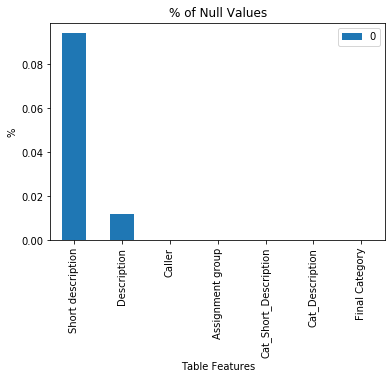

In [37]:
fig1 = plt.figure()
#plt.plot(null_value)
null_value.plot(kind='bar')
plt.title('% of Null Values')
plt.ylabel('%')
plt.xlabel('Table Features')

In [0]:
import plotly.express as px

In [39]:
null_value = pd.DataFrame(null_value)
null_value

,0
Short description,0.094206
Description,0.011766
Caller,0.000000
Assignment group,0.000000
Cat_Short_Description,0.000000
Cat_Description,0.000000
Final Category,0.000000


In [0]:
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
group_freq = pd.DataFrame(group_freq)

In [41]:
group_freq

,Assignment group
Assignment group,
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_67,1
GRP_61,1
GRP_73,1


In [0]:
group_freq["cumpercentage"] = group_freq["Assignment group"].cumsum()/group_freq["Assignment group"].sum()*100

In [0]:
from matplotlib.ticker import PercentFormatter

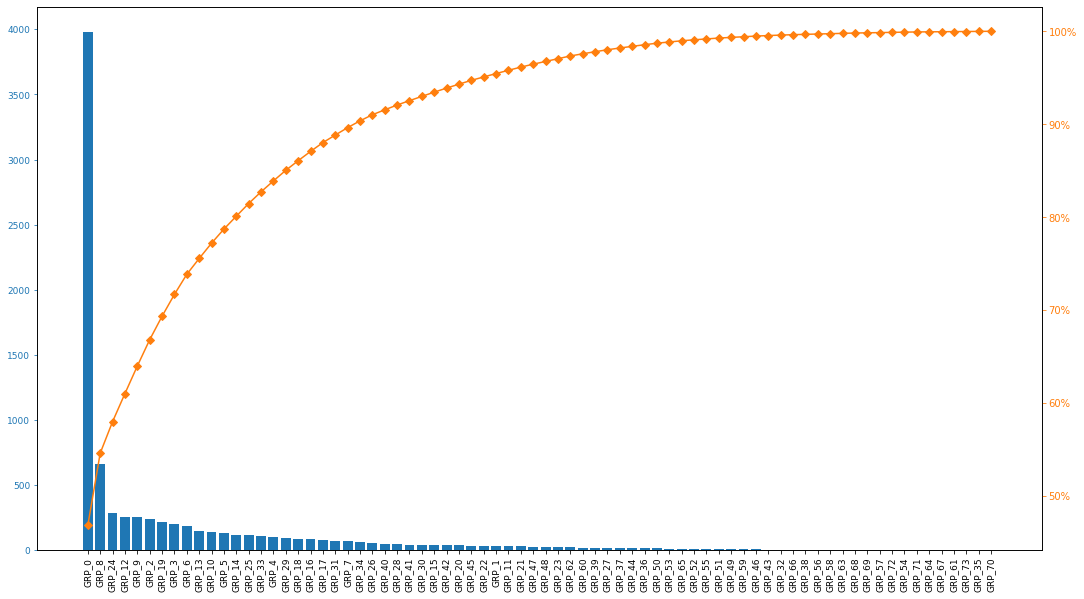

In [44]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq.index, group_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq.index, group_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
group_freq_lang = df.groupby(df['Final Category'])['Final Category'].count().sort_values(ascending=False)
group_freq_lang = pd.DataFrame(group_freq_lang)

In [46]:
group_freq_lang

,Final Category
Final Category,
English,7985
German,451
Special Char,53
Spanish,11


In [47]:
group_cat_freq_lang = df.groupby(df['Cat_Short_Description'])['Cat_Short_Description'].count().sort_values(ascending=False)
group_cat_freq_lang = pd.DataFrame(group_freq_lang)
group_cat_freq_lang

,Final Category
Final Category,
English,7985
German,451
Special Char,53
Spanish,11


In [48]:
group_cat_desc = df.groupby(df['Cat_Description'])['Cat_Description'].count().sort_values(ascending=False)
group_cat_desc = pd.DataFrame(group_freq_lang)
group_cat_desc

,Final Category
Final Category,
English,7985
German,451
Special Char,53
Spanish,11


In [0]:
group_freq_lang["cumpercentage"] = group_freq_lang["Final Category"].cumsum()/group_freq_lang["Final Category"].sum()*100

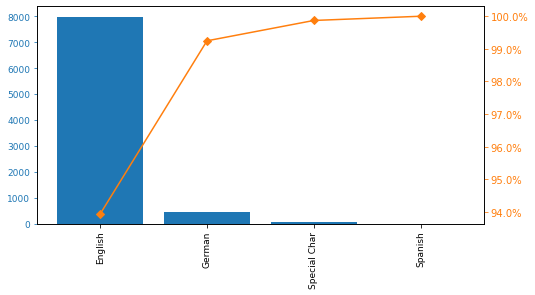

In [50]:
fig, ax = plt.subplots(figsize=(8,4))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq_lang.index, group_freq_lang["Final Category"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq_lang.index, group_freq_lang["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [51]:
a = df['Caller'].unique()
a = pd.DataFrame(a)
a.count()

0    2950
dtype: int64

In [0]:
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)

In [53]:
caller_freq.head(2000)

,Caller,cumpercentage
Caller,,
bpctwhsn kzqsbmtp,810,9.53
ZkBogxib QsEJzdZO,151,11.31
fumkcsji sarmtlhy,134,12.88
rbozivdq gmlhrtvp,87,13.91
rkupnshb gsmzfojw,71,14.74
...,...,...
dcsaiweo qvstjlem,1,88.78
xwyrvcbj bmqfszjg,1,88.79
xwlcqfsr lbcqfnie,1,88.80


# Inference : EDA Part I - (Uni-variate analysis):

1) Dataset contains total 8500 rows, attributes 'Short description' and 'Description' contains null values. Dataset contains total 7 coumns all has datatype as object.

2) There are total 74 unique groups(dependent attributes), 2950 unique callers and 4 unique languages into dataset.

3) There are less than 0.1% of null values(null input) into entire dataset. 

4) 'Assignment group' - GRP_0 contribute 46% of values into target attributes. It is indication that GRP_0 handles 46% of input tickets. Secondly, Contribution of many other Assignment group are less than 1%. 
Imbalace of target group observed and suggested to discussed with clients and request for futher data collection on other 'Assignment group', which will help to improve the accuracy level at group level while model building. There is high probability of getting low accuracy rate with provided dataset for those groups having very limited data point to train the model. 

5) 95% of input language identified as an English into dataset. As other languate contribution is less than 8 to 10%, other input language considered as an outlier and such data points are removed from dataset for futher study and model building. 

6) Only Caller: 'bpctwhsn kzqsbmtp' generates 10% of the total input tickets. It is indication of higher amount of multiple issues with single caller. There is not significant amount of contribution into total input tickets identified with all other callers. 


Bi-Variate Analysis

In [0]:
grp_lang = pd.crosstab(df['Assignment group'],df['Final Category'],normalize='index').round(5)*100


In [55]:
grp_lang

Final Category,English,German,Spanish,Special Char
Assignment group,,,,
GRP_0,97.309,2.666,0.025,0.000
GRP_1,100.000,0.000,0.000,0.000
GRP_10,97.143,2.857,0.000,0.000
GRP_11,96.667,3.333,0.000,0.000
GRP_12,89.883,9.728,0.000,0.389
...,...,...,...,...
GRP_71,100.000,0.000,0.000,0.000
GRP_72,100.000,0.000,0.000,0.000
GRP_73,100.000,0.000,0.000,0.000


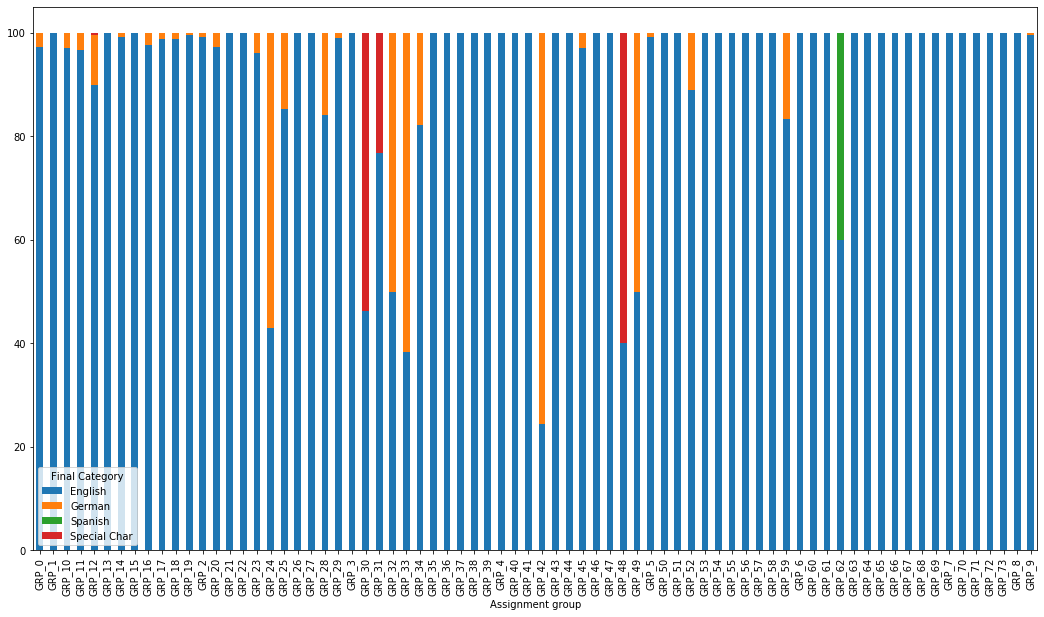

In [56]:
grp_lang.plot(kind='bar',stacked='True',figsize=(18,10))

In [0]:
group_freq["%_contri"] = group_freq["Assignment group"]/group_freq["Assignment group"].sum()*100

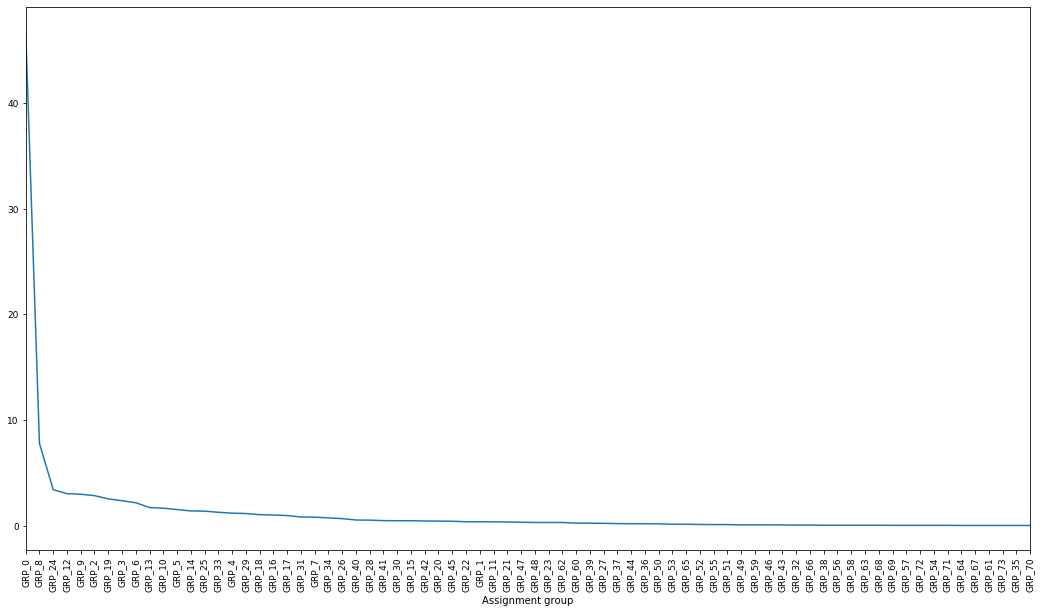

In [58]:
plt.xticks(range(0, 74))
group_freq["%_contri"].plot(kind='line',figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)

In [59]:
caller_grp = pd.crosstab(df['Final Category']=='German',df['Caller'])
caller_grp.T

Final Category,False,True
Caller,,
DEsowkrH sciejzNE,2,0
HdOuWxAt qfKdlJMx,1,0
ZkBogxib QsEJzdZO,151,0
abiuclvj brziktno,1,0
abtknpew ifcekjdb,1,0
...,...,...
zylaexnv pvkzbduh,3,0
zylwdbig wdkbztjp,1,0
zymdwqsi jzvbthil,1,0


In [0]:
a = df[df['Final Category']== 'German']

In [61]:
caller_freq = a.groupby(a['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
jionmpsf wnkpzcmv,16,3.55
vzqomdgt jwoqbuml,12,6.21
niptbwdq csenjruz,12,8.87
wrcktgbd wzrgyunp,8,10.64
xwirzvda okhyipgr,6,11.97
...,...,...
plfwoagd chtpiazu,1,99.11
pjrcbhln qznblemc,1,99.33
phedsjct lyphanue,1,99.56


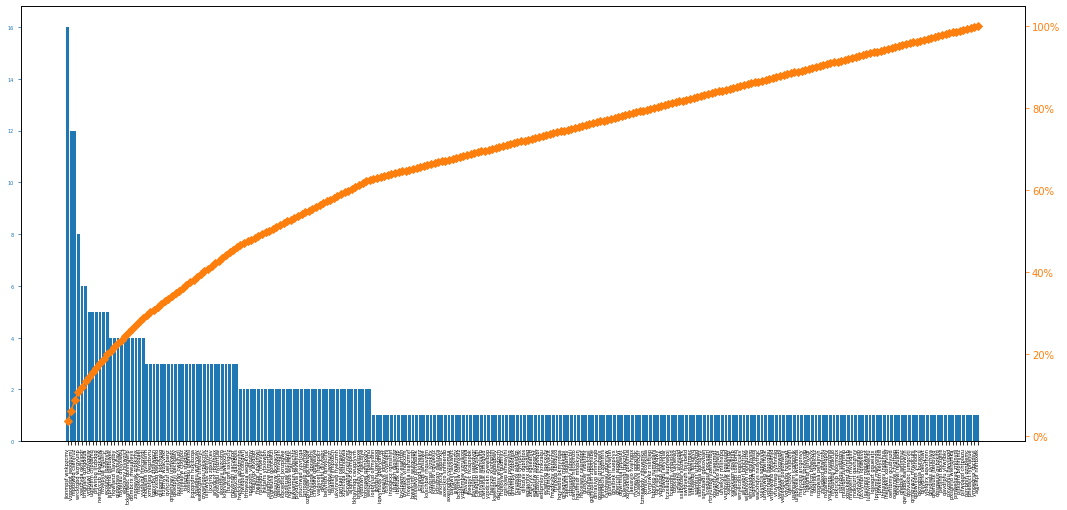

In [62]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=5)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Caller"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [63]:
caller_freq = a.groupby(a['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_24,165,36.59
GRP_0,106,60.09
GRP_33,66,74.72
GRP_42,28,80.93
GRP_12,25,86.47
GRP_25,17,90.24
GRP_34,11,92.68
GRP_28,7,94.24
GRP_10,4,95.12


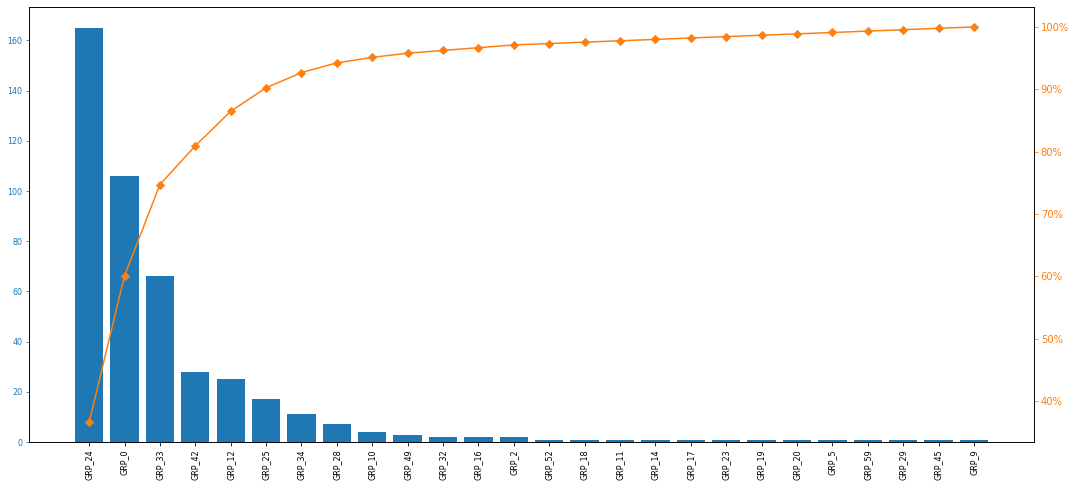

In [64]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
b = df[df['Final Category']== 'Special Char']

In [66]:
caller_freq = b.groupby(b['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
agyvbnwz mxsonkdc,3,5.66
kyagjxdh dmtjpbnz,3,11.32
xqyjztnm onfusvlz,2,15.09
hlrmufzx qcdzierm,2,18.87
zhpwcdea cboefuis,1,20.75
hbvwqine eakqyovu,1,22.64
kwpzbxvf cvuhoizx,1,24.53
ktghvuwr uwtakcmj,1,26.42
kclhqspo xvugztyc,1,28.30


In [67]:
caller_freq = b.groupby(b['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_30,21,39.62
GRP_31,16,69.81
GRP_48,15,98.11
GRP_12,1,100.00


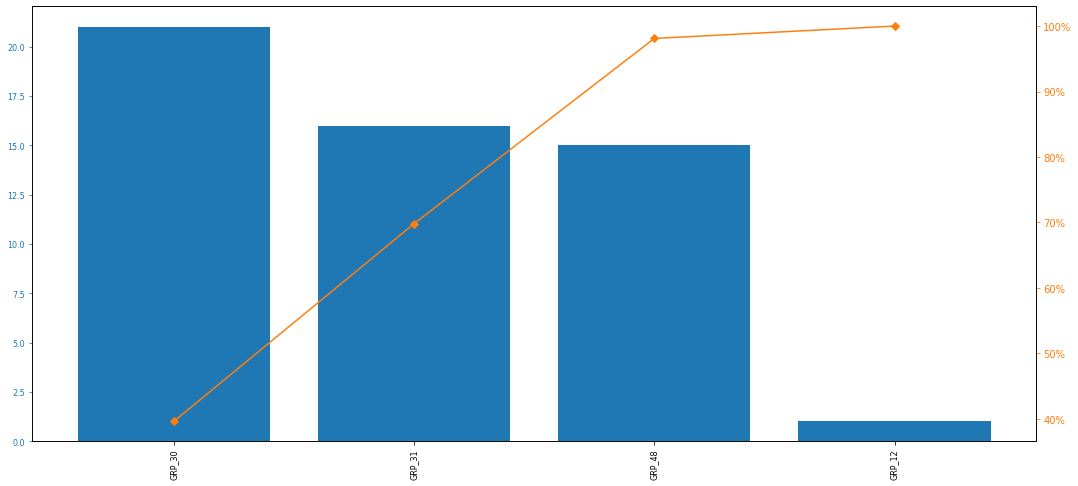

In [68]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)
df['Caller'] = df['Caller'].astype(str)

In [0]:
df1 = df.copy(deep=True) # Removed non-englished row

In [71]:
df1.shape

(8500, 7)

In [72]:
df1.drop(df1[df1['Final Category'] == 'German'].index, inplace = True)
df1.drop(df1[df1['Final Category'] == 'Spanish'].index, inplace = True)
df1.drop(df1[df1['Final Category'] == 'Special Char'].index, inplace = True)
df1.shape

(7985, 7)

In [73]:
df1['Description_len'] = df1['Description'].astype(str).apply(len)
df1['Short_Dec_len'] = df1['Short description'].astype(str).apply(len)

df1['Des_wrd_cnt'] = df1['Description'].apply(lambda x: len(str(x).split()))
df1['Short_Des_wrd_cnt'] = df1['Short description'].apply(lambda x: len(str(x).split()))

df1.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English,206,11,33,2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English,194,7,25,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English,87,18,11,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,29,29,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,12,12,2,2


In [74]:
print(df1['Des_wrd_cnt'].describe())
print(np.percentile(df1['Des_wrd_cnt'],90))
print(np.percentile(df1['Des_wrd_cnt'],95))

count    7985.000000
mean       27.692048
std        66.401108
min         0.000000
25%         6.000000
50%        11.000000
75%        29.000000
max      1625.000000
Name: Des_wrd_cnt, dtype: float64
58.0
97.0


In [75]:
df1[df1['Des_wrd_cnt']==0]

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
6371,authorization add/delete members,\r\n\r\n,hpmwliog kqtnfvrl,GRP_0,English,English,English,5,33,0,3
7397,browser issue :,\r\n,fgejnhux fnkymoht,GRP_0,English,English,English,2,16,0,3


In [76]:
print(df1['Short_Des_wrd_cnt'].describe())
print(np.percentile(df1['Short_Des_wrd_cnt'],90))
print(np.percentile(df1['Short_Des_wrd_cnt'],95))

count    7985.00000
mean        6.99712
std         4.15049
min         1.00000
25%         4.00000
50%         6.00000
75%         9.00000
max        28.00000
Name: Short_Des_wrd_cnt, dtype: float64
13.0
16.0


## Inference : EDA Part II - (Bi-variate analysis):

1) Input language Vs Assignment group study: Assignement groups - GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contains more than 25% of non english input text(other languages like German, Spanish, Special character)

2) GRP_42 receives highest amount(greater than 40%)of non english input text (Other languages)

3) Rest other Assigment group has very few(less than 1%) or null amount of non english input text(Other languages)

4) GRP_24 contributes 3% of total dataset, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contributes less than or equal to 1% of total dataset. 

5) Input language Vs Caller: There is no significant caller specific contribution into providing non english input text (other languages like German, Spanish, Special character)

6) 5) Input language Vs Assignment group: There is no significant Assignment group specific contribution into providing German, Spanish and Special character as an input into dataset. 


Based on all the above findings, 
As contribution of all these groups GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 are not more than 6% to total dataset. Additionally, there is no significant relationship with caller and input language texts. All non-english input texts considered as outliers and removed for futher study and model building. 

7) Right skewed distribution observed for number of word count for attribute 'Description' & 'Short Description', reflected with difference between mean and median values of number of word count. It is indication of number of sentence having higher amout of number of word counts into dataset. No of word count shall be explored while building sequential model building.  

In [77]:
df1.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English,206,11,33,2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English,194,7,25,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English,87,18,11,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,29,29,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,12,12,2,2


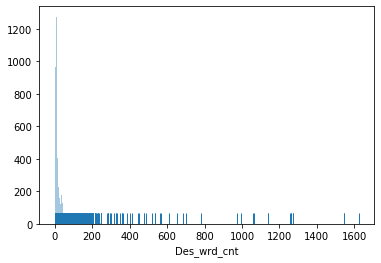

In [78]:
sns.distplot(df1['Des_wrd_cnt'],kde=False,bins=700,rug=True)

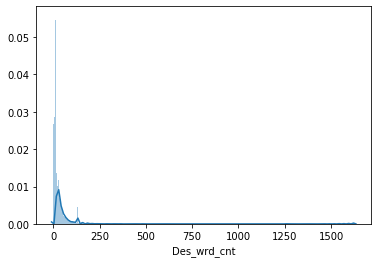

In [79]:
sns.distplot(df1['Des_wrd_cnt'], kde=True,bins=500)

In [0]:
import re

In [0]:
df2 = df1.copy(deep = 'True') #Used for preprocessing of text

In [0]:
df2.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Short_Des_wrd_cnt'],axis=1,inplace=True)

In [0]:
df2['Description'] = df2['Description'].astype(str)
df2['Short description'] = df2['Short description'].astype(str)
df2['Caller'] = df2['Caller'].astype(str)

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 8498
Data columns (total 7 columns):
Short description        7985 non-null object
Description              7985 non-null object
Caller                   7985 non-null object
Assignment group         7985 non-null object
Cat_Short_Description    7985 non-null object
Cat_Description          7985 non-null object
Final Category           7985 non-null object
dtypes: object(7)
memory usage: 499.1+ KB


In [87]:
df2['Description'][7985]

'ess password reset'

In [88]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\W", ' ', x)) # Removed all punctuations or non word characters marks
#df1['Description'] = df1['Description'].apply(lambda x: x.lower()) #Converted to lower case
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r'\s+[a-z]\s+', ' ', x)) # Removed all single characters
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^[a-z]\s+", ' ', x)) # Removed all single characters from start of the sentence
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]", ' ', x)) # Removed all the special characters
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+", ' ', x))# Removed extra (one or more) spaces
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\d", '', x)) # Removed digits
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+[a-zA-Z]\s+", '', x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^\s", '', x)) # Removed all the space at starta and end of sentences
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s$", '', x)) ## Removed all the space at starta and end of sentences
#df1['Description'] = df1['Description'].apply(lambda x: re.sub("([^\x00-\x7F])+", '', x))

In [0]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(text):
    sentence     = str(text)
    sentence_low = sentence.lower()                                            #Converted to lower case
    rem_hyper    = sentence_low.replace('{html}',' ')                          #Remove hyperlink  
    rem_url      = re.sub(r'http:\S+', ' ',rem_hyper)                          #Remove Web link
    rem_mail     = re.sub(r"\S*@\S*.com\s?",' ',rem_url)                       #Remove mail Id
    txt_expand   = contractions.fix(rem_mail)                                  #Expand text
    rem_special  = re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]",' ',txt_expand) # Removed all the special characters 
    rem_num      = re.sub(r'\d', '', rem_special)                              #Remove digit
    rem_single   = re.sub(r"\s+[a-zA-Z]\s+", ' ',rem_num)                      #Remove single char
    rem_spa      = re.sub(r"\s+", ' ',rem_single)                              #Remove extra spaces
    
    tokenizer    = RegexpTokenizer(r'\w+')
    text_token   = tokenizer.tokenize(rem_spa)                                #Text tokenized  
    filter_words = [w for w in text_token if len(w) > 2 if not w in stopwords.words('english')] #Remove stop words
#    word_stemm   = [stemmer.stem(w) for w in filter_words]                   #Word Stemming                    
    word_lemma   = [lemmatizer.lemmatize(w) for w in filter_words]            #Word Lemmatization
    clean_text   = word_lemma
    return " ".join(clean_text)

In [91]:
df2['Short description'][7]  #before pre-process

"ticket_no1550391- employment status - new non-employee [enter user's name]"

In [0]:
df2['Short description'] = df2['Short description'].map(lambda x:preprocess(x))
df2['Description'] = df2['Description'].map(lambda x:preprocess(x))

In [93]:
df2['Short description'][7]  #after process

'ticket employment status new non employee enter user name'

In [0]:
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"that's","that is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"there's","there is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"what's","what is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"where's","where is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"it's","it is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who's","who is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"i'm","i am",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"she's","she is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"he's","he is",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"they're","they are",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who're","who are", x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"ain't","am not", x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"wouldn't","would not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"can't","can not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"shouldn't","should not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"couldn't","could not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"won't","will not",x))
#df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"isn't","is not",x))

In [94]:
df2.head(10)

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English
5,unable log engineering tool skype,unable log engineering tool skype,eflahbxn ltdgrvkz,GRP_0,English,English,English
6,event critical hostname company com value moun...,event critical hostname company com value moun...,jyoqwxhz clhxsoqy,GRP_1,English,English,English
7,ticket employment status new non employee ente...,ticket employment status new non employee ente...,eqzibjhw ymebpoih,GRP_0,English,English,English
8,unable disable add in outlook,unable disable add in outlook,mdbegvct dbvichlg,GRP_0,English,English,English
9,ticket update inplant,ticket update inplant,fumkcsji sarmtlhy,GRP_0,English,English,English


In [95]:
df2['Description'][1]

'received hello team meeting skype meeting etc appearing outlook calendar somebody please advise correct kind'

In [96]:
df1['Description'][1]

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [97]:
df2.describe()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
count,7985,7985,7985,7985,7985,7985,7985
unique,5574,5994,2772,74,2,1,1
top,job job failed job scheduler,received job job failed job scheduler,bpctwhsn kzqsbmtp,GRP_0,English,English,English
freq,471,464,810,3869,7984,7985,7985


In [0]:
#!pip install langdetect
#from langdetect import detect
#df1['lang'] = " "
#store = []
#for i in range(8500):
#  try:
#    desc = df1['Description'][i]
#    temp = detect(desc)
#    store.append(temp)
#  except:
#    language = "error"
#    print("This row throws and error:", df1['Description'][i])
  #print(temp)

In [0]:
#store1 = pd.DataFrame(store)
#store1['lang'] = store1
#store1.head(5)

In [0]:
#df1['Description'][4]

In [0]:
#store1.groupby(store1['lang'])['lang'].count().sort_values(ascending=False)

In [0]:
df3 = df2.copy(deep=True) 

In [101]:
df3.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [102]:
df3['Description_len'] = df3['Description'].astype(str).apply(len)
df3['Short_Dec_len'] = df3['Short description'].astype(str).apply(len)

df3['Des_wrd_cnt'] = df3['Description'].apply(lambda x: len(str(x).split()))
df3['Short_Des_wrd_cnt'] = df3['Short description'].apply(lambda x: len(str(x).split()))

df3.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English,143,11,21,2
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English,108,7,15,1
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English,28,7,5,2
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,23,23,4,4
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,11,11,2,2


In [108]:
print("After Preprocess Text:")
print(df3.describe().round(2))

After Preprocess Text:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7985.00        7985.00      7985.00            7985.00
mean            115.68          33.29        16.55               4.94
std             265.79          18.63        37.26               2.53
min               0.00           0.00         0.00               0.00
25%              30.00          21.00         4.00               3.00
50%              50.00          28.00         7.00               5.00
75%             123.00          42.00        17.00               6.00
max            5782.00         141.00       759.00              18.00


In [109]:
print("Before Preprocess Text:")
print(df1.describe().round(2))

Before Preprocess Text:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7985.00        7985.00      7985.00            7985.00
mean            207.80          47.56        27.69               7.00
std             532.36          27.71        66.40               4.15
min               1.00           1.00         0.00               1.00
25%              41.00          26.00         6.00               4.00
50%             106.00          41.00        11.00               6.00
75%             206.00          63.00        29.00               9.00
max           13001.00         196.00      1625.00              28.00


In [110]:
df3.shape

(7985, 11)

In [111]:
print(df3['Description_len'][df3['Description_len']==0].count())
print(df3['Short_Dec_len'][df3['Short_Dec_len']==0].count())
print(df3['Des_wrd_cnt'][df3['Des_wrd_cnt']==0].count())
print(df3['Short_Des_wrd_cnt'][df3['Short_Des_wrd_cnt']==0].count())

62
14
62
14


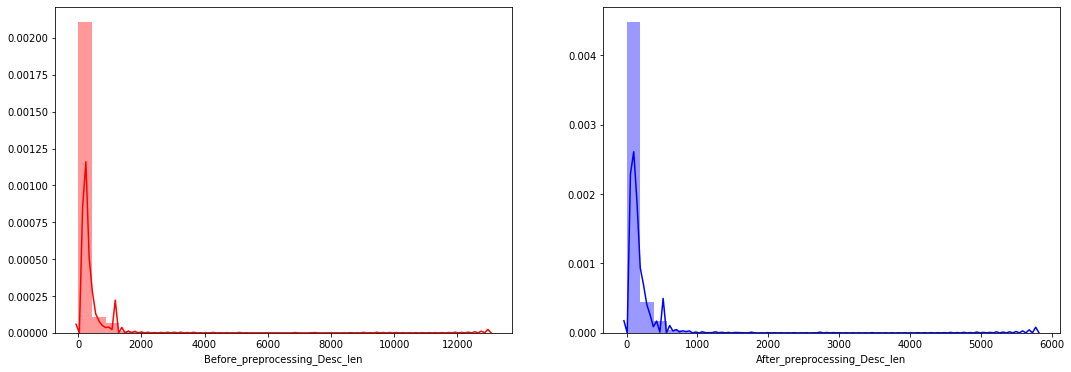

In [0]:
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,figsize=(18,6))
sns.distplot(df1['Description_len'],ax=ax1,color="red",kde=True,bins=30,axlabel="Before_preprocessing_Desc_len")
sns.distplot(df3['Description_len'],ax=ax2,color="blue",kde=True,bins=30,axlabel='After_preprocessing_Desc_len')


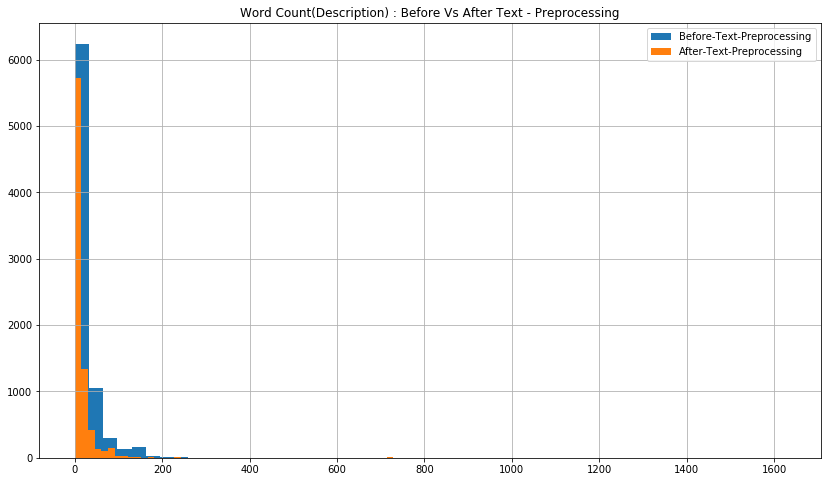

In [125]:
fig = plt.figure(figsize=(14, 8))
plt.title("Word Count(Description) : Before Vs After Text - Preprocessing")
df1['Des_wrd_cnt'].hist(bins=50,label='Before-Text-Preprocessing')
df3['Des_wrd_cnt'].hist(bins=50,label='After-Text-Preprocessing')
plt.legend(loc='best')

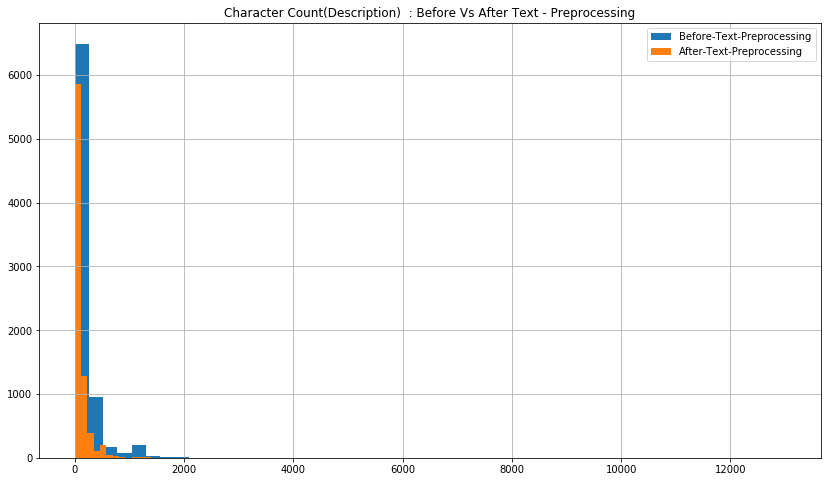

In [127]:
fig = plt.figure(figsize=(14, 8))
plt.title("Character Count(Description)  : Before Vs After Text - Preprocessing")
df1['Description_len'].hist(bins=50,label='Before-Text-Preprocessing')
df3['Description_len'].hist(bins=50,label='After-Text-Preprocessing')
plt.legend(loc='best')

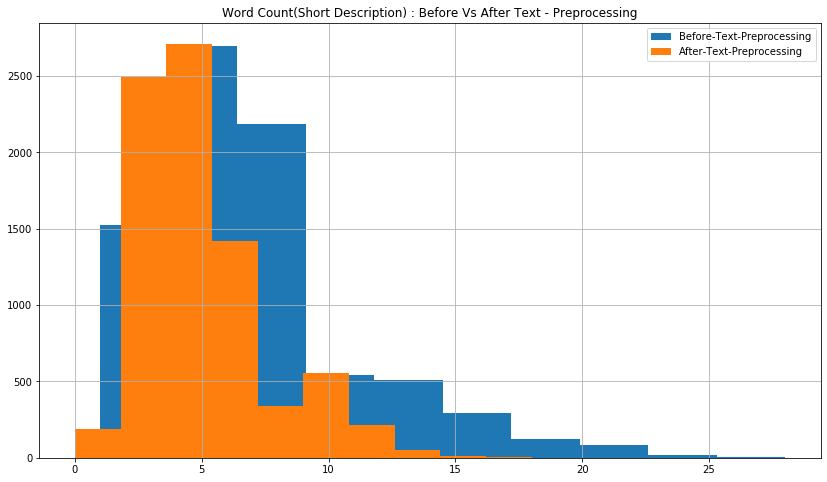

In [130]:
fig = plt.figure(figsize=(14, 8))
plt.title("Word Count(Short Description) : Before Vs After Text - Preprocessing")
df1['Short_Des_wrd_cnt'].hist(label='Before-Text-Preprocessing')
df3['Short_Des_wrd_cnt'].hist(label='After-Text-Preprocessing')
plt.legend(loc='best')

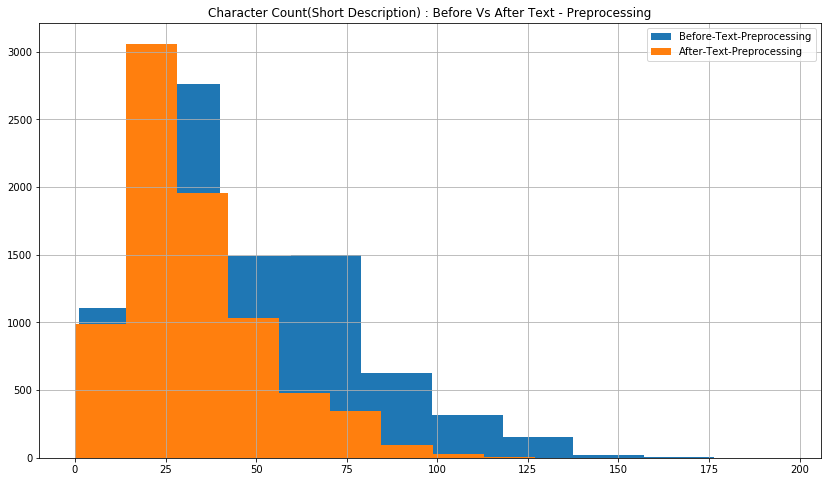

In [131]:
fig = plt.figure(figsize=(14, 8))
plt.title("Character Count(Short Description) : Before Vs After Text - Preprocessing")
df1['Short_Dec_len'].hist(label='Before-Text-Preprocessing')
df3['Short_Dec_len'].hist(label='After-Text-Preprocessing')
plt.legend(loc='best')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df3['Description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20 = top_20.groupby('Description').sum()['count'].sort_values(ascending=False)

job 2574
received 2300
yes 2027
please 1929
password 1413
user 1398
company 1192
erp 1156
sid 1088
tool 1045
scheduler 969
issue 961
access 958
ticket 934
failed 906
reset 837
unable 784
error 777
account 752
site 707


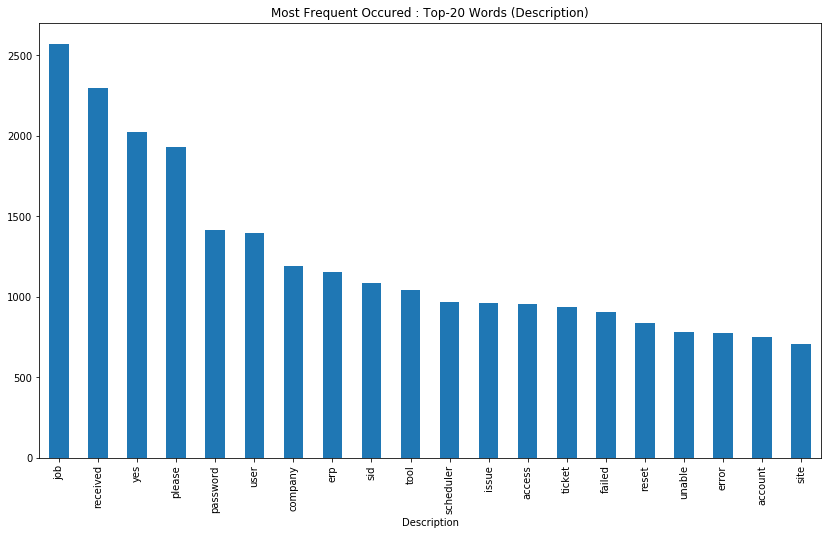

In [139]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Words (Description)")
top_20.plot(kind='bar')

In [142]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df3['Short description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_s = pd.DataFrame(common_words, columns = ['Short description' , 'count'])
top_20_s = top_20_s.groupby('Short description').sum()['count'].sort_values(ascending=False)

job 2523
password 1141
scheduler 959
erp 853
failed 828
tool 733
unable 712
reset 683
sid 597
issue 557
account 519
access 461
outlook 393
hostname 350
company 336
login 305
locked 297
working 291
user 289
ticket 284


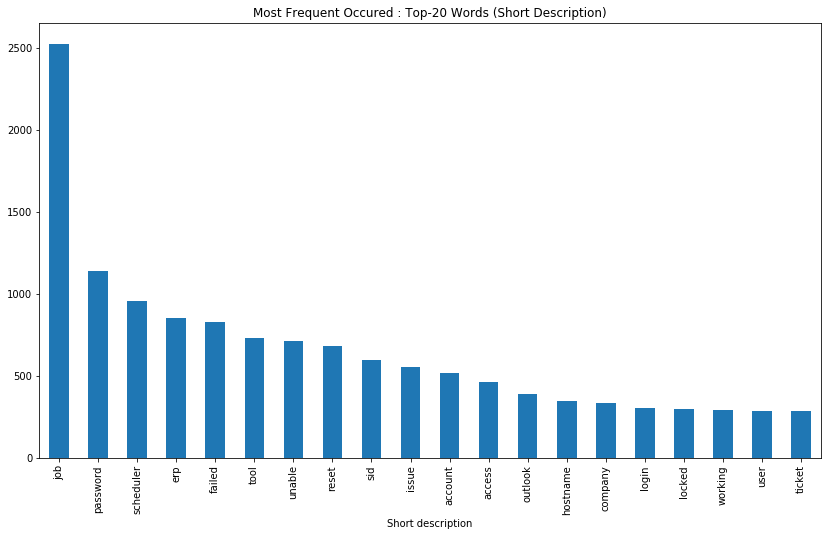

In [146]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Words (Short Description)")
top_20_s.plot(kind='bar')

In [145]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df3['Description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_b_d = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20_b_d = top_20_b_d.groupby('Description').sum()['count'].sort_values(ascending=False)

job scheduler 969
failed job 809
received job 786
job job 631
job failed 478
cid image 446
backup circuit 427
received hello 390
password reset 354
telecom vendor 302
erp sid 296
type outage 286
scheduled maintenance 286
yes company 285
circuit yes 285
engineering tool 252
image png 249
yes yes 234
please help 219
collaboration platform 208


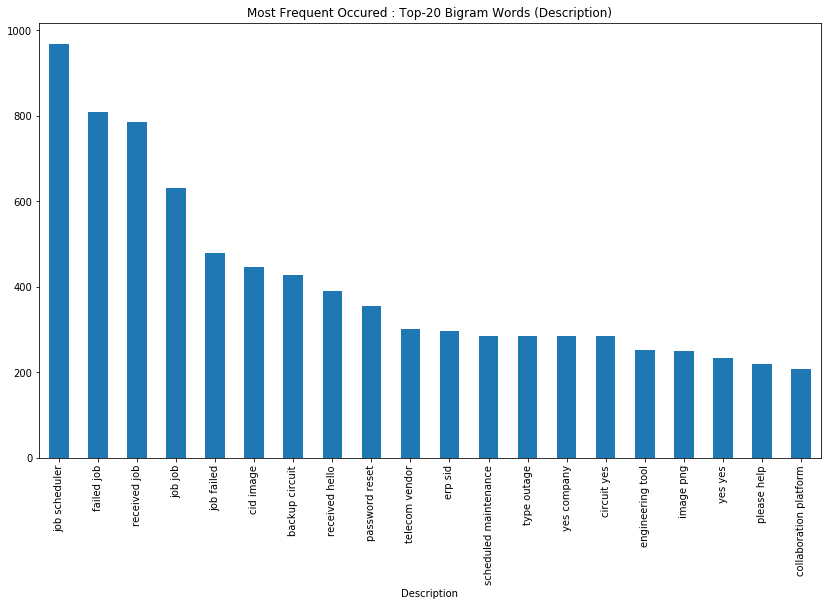

In [147]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Bigram Words (Description)")
top_20_b_d.plot(kind='bar')

In [148]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df3['Short description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_b_sd = pd.DataFrame(common_words, columns = ['Short description' , 'count'])
top_20_b_sd = top_20_b_sd.groupby('Short description').sum()['count'].sort_values(ascending=False)

job scheduler 959
failed job 805
job job 632
job failed 474
password reset 427
erp sid 282
account locked 199
reset password 198
engineering tool 192
password management 161
management tool 161
ticket update 152
tool password 148
abended job 148
collaboration platform 142
unable login 124
job sid 106
sid account 101
using password 100
update inplant 91


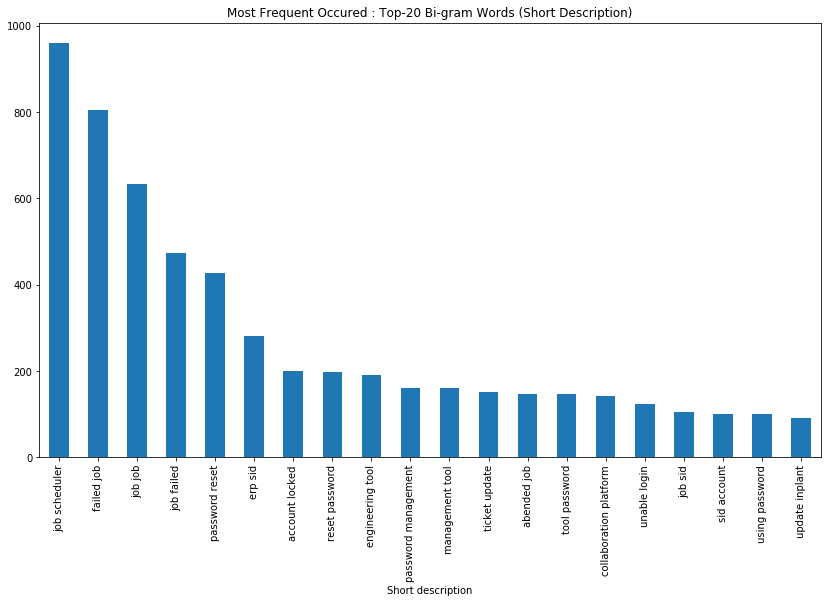

In [149]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Bi-gram Words (Short Description)")
top_20_b_sd.plot(kind='bar')

In [0]:
df4 = df3.copy(deep=True)
df5 = df3.copy(deep=True)

In [156]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 8498
Data columns (total 11 columns):
Short description        7985 non-null object
Description              7985 non-null object
Caller                   7985 non-null object
Assignment group         7985 non-null object
Cat_Short_Description    7985 non-null object
Cat_Description          7985 non-null object
Final Category           7985 non-null object
Description_len          7985 non-null int64
Short_Dec_len            7985 non-null int64
Des_wrd_cnt              7985 non-null int64
Short_Des_wrd_cnt        7985 non-null int64
dtypes: int64(4), object(7)
memory usage: 748.6+ KB


In [0]:
df4.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Caller','Short_Des_wrd_cnt','Caller','Cat_Short_Description','Cat_Description','Final Category','Short description'],axis=1,inplace=True)
df5.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Caller','Short_Des_wrd_cnt','Caller','Cat_Short_Description','Cat_Description','Final Category','Description'],axis=1,inplace=True)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()
x = cv.fit_transform(df4['Description'])
y = df4['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [162]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)

0.6908265497808391
0.6399499060738886


In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.66      0.98      0.79       823
       GRP_1       0.00      0.00      0.00         5
      GRP_10       1.00      0.04      0.08        23
      GRP_11       0.00      0.00      0.00         7
      GRP_12       0.51      0.55      0.53        33
      GRP_13       0.38      0.43      0.41        30
      GRP_14       0.50      0.18      0.26        17
      GRP_15       0.00      0.00      0.00        12
      GRP_16       0.00      0.00      0.00        14
      GRP_17       0.00      0.00      0.00        20
      GRP_18       0.33      0.09      0.14        23
      GRP_19       0.33      0.07      0.11        45
       GRP_2       0.60      0.25      0.36        59
      GRP_20       0.00      0.00      0.00        12
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         9
      GRP_23       0.00      0.00      0.00         7
      GRP_24       0.78    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [0]:
cv = CountVectorizer()
x1 = cv.fit_transform(df5['Short description'])
y1 = df5['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [166]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x1_train, y1_train)
print(model.score(x1_train,y1_train))
print(model.score(x1_test,y1_test))
y_pred = model.predict(x1_test)

0.6981840951784596
0.6505948653725736


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.68      0.97      0.80       823
       GRP_1       0.00      0.00      0.00         5
      GRP_10       1.00      0.04      0.08        23
      GRP_11       0.00      0.00      0.00         7
      GRP_12       0.45      0.52      0.48        33
      GRP_13       0.44      0.37      0.40        30
      GRP_14       0.50      0.18      0.26        17
      GRP_15       0.00      0.00      0.00        12
      GRP_16       0.00      0.00      0.00        14
      GRP_17       0.95      1.00      0.98        20
      GRP_18       0.00      0.00      0.00        23
      GRP_19       0.38      0.11      0.17        45
       GRP_2       0.62      0.25      0.36        59
      GRP_20       1.00      0.08      0.15        12
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         9
      GRP_23       1.00      0.14      0.25         7
      GRP_24       0.75    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [0]:
MAX_NB_WORDS = 20000

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS,split=' ')
Description_df = df2['Description']
tokenizer.fit_on_texts(Description_df)

Encoding the data using Tokenizer

In [0]:
print(len(tokenizer.word_index))

12132


Removing Stopwords from Description column

In [0]:
Description = []
for sentence in Description_df:
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
        filtered_sentence.append(w)
  Description.append(filtered_sentence)

In [0]:
print(Description[0])

['verified', 'user', 'details', 'employee', 'manager', 'name', 'checked', 'user', 'name', 'ad', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able', 'login', 'issue', 'resolved']


In [0]:
len(Description[0])

22

Getting the maximun word count present in Description Column

In [0]:
MAX_SENT_LENGTH=0
for desc in Description:
  if MAX_SENT_LENGTH < len(desc):
    MAX_SENT_LENGTH = len(desc)
print(MAX_SENT_LENGTH)      

1136


Creating Data array to hold word index values

In [0]:
import numpy as np
data = np.zeros((len(Description),20))
data.shape

(7985, 20)

In [0]:
data=data.astype('int32')

Replacing dummy array with word index values for each Description

In [0]:
from keras.preprocessing.text import text_to_word_sequence
x=0
for description in Description:
  tkn = tokenizer.texts_to_sequences(description)#converting text to sequence
  if(len(tkn)>0):
    token_indexed = np.concatenate(tkn,axis=0).tolist()#converting array of array to single array
    token_indexed = np.pad(token_indexed,(0,20))#appending max word count for each description
    token_indexed = token_indexed[0:20]#get the first 822 values from each token
    data[x]= token_indexed
    x=x+1

In [0]:
print(data[0])

[202  21 210 259 114  46 367  21  46 277  34  20 508  21  62 104 358 296
  90  62]


Convert labels into one-hot vectors

In [0]:
assignment_group = pd.DataFrame(df2['Assignment group'])
group = pd.get_dummies(assignment_group,columns=['Assignment group'])

In [0]:
group.head()

,Assignment group_GRP_0,Assignment group_GRP_1,Assignment group_GRP_10,Assignment group_GRP_11,Assignment group_GRP_12,Assignment group_GRP_13,Assignment group_GRP_14,Assignment group_GRP_15,Assignment group_GRP_16,Assignment group_GRP_17,Assignment group_GRP_18,Assignment group_GRP_19,Assignment group_GRP_2,Assignment group_GRP_20,Assignment group_GRP_21,Assignment group_GRP_22,Assignment group_GRP_23,Assignment group_GRP_24,Assignment group_GRP_25,Assignment group_GRP_26,Assignment group_GRP_27,Assignment group_GRP_28,Assignment group_GRP_29,Assignment group_GRP_3,Assignment group_GRP_30,Assignment group_GRP_31,Assignment group_GRP_32,Assignment group_GRP_33,Assignment group_GRP_34,Assignment group_GRP_35,Assignment group_GRP_36,Assignment group_GRP_37,Assignment group_GRP_38,Assignment group_GRP_39,Assignment group_GRP_4,Assignment group_GRP_40,Assignment group_GRP_41,Assignment group_GRP_42,Assignment group_GRP_43,Assignment group_GRP_44,Assignment group_GRP_45,Assignment group_GRP_46,Assignment group_GRP_47,Assignment group_GRP_48,Assignment group_GRP_49,Assignment group_GRP_5,Assignment group_GRP_50,Assignment group_GRP_51,Assignment group_GRP_52,Assignment group_GRP_53,Assignment group_GRP_54,Assignment group_GRP_55,Assignment group_GRP_56,Assignment group_GRP_57,Assignment group_GRP_58,Assignment group_GRP_59,Assignment group_GRP_6,Assignment group_GRP_60,Assignment group_GRP_61,Assignment group_GRP_62,Assignment group_GRP_63,Assignment group_GRP_64,Assignment group_GRP_65,Assignment group_GRP_66,Assignment group_GRP_67,Assignment group_GRP_68,Assignment group_GRP_69,Assignment group_GRP_7,Assignment group_GRP_70,Assignment group_GRP_71,Assignment group_GRP_72,Assignment group_GRP_73,Assignment group_GRP_8,Assignment group_GRP_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
labels = np.array(group)
print(labels[0])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Check the shape of data and label arrays

In [0]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (7985, 20)
Shape of label tensor: (7985, 74)


Shuffling the data & labels

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Creating training and testing set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(data,labels, test_size = 0.20, random_state = 42)

In [0]:
X_train[0]

array([  9,  86,  90,  62, 935,  27, 557, 171, 194, 599,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(6388, 20)
(6388, 74)
(1597, 20)
(1597, 74)


In [0]:
X_train[0]

array([  9,  86,  90,  62, 935,  27, 557, 171, 194, 599,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
from keras.layers import Bidirectional
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=20))
model.add(Bidirectional(LSTM(130)))
model.add(Dense(74, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 32)            640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_4 (Dense)              (None, 74)                19314     
Total params: 828,834
Trainable params: 828,834
Non-trainable params: 0
_________________________________________________________________
None
Train on 6388 samples, validate on 1597 samples
Epoch 1/3
6388/6388 [==============================] - 12s 2ms/step - loss: 0.0495 - acc: 0.9864 - val_loss: 0.0445 - val_acc: 0.9865
Epoch 2/3
6388/6388 [==============================] - 9s 1ms/step - loss: 0.0450 - acc: 0.9867 - val_loss: 0.0447 - val_acc: 0.9865
Epoch 3/3
6388/6388 [==============================] - 9s 

In [0]:
y_pred = model.predict(X_val)

In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.52      0.57      0.55       786
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        29
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        38
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         6
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Activation 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import Bidirectional, TimeDistributed
from keras.callbacks import EarlyStopping
from keras.models import Model, Sequential
from keras.layers import Dense, BatchNormalization, Input, Concatenate, concatenate,Activation, Flatten, Dropout, Embedding, LSTM, Bidirectional, GlobalMaxPool1D, merge, TimeDistributed
from keras.optimizers import SGD
from keras import backend as K
K.clear_session()

In [0]:
from keras.layers import Bidirectional
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=20))
#
# model.add(embedding_matrix)
#model.add(Dropout(0.2))

model.add(LSTM(300))
model.add(Dropout(0.2))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 74, activation = 'softmax'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 32)            640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 300)               399600    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               77056     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [EarlyStopping(monitor='val_loss',patience=5)]

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs = 300, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6388 samples, validate on 1597 samples
Epoch 1/300
6388/6388 [==============================] - 18s 3ms/step - loss: 2.6820 - acc: 0.4790 - val_loss: 2.5395 - val_acc: 0.4890
Epoch 2/300
6388/6388 [==============================] - 16s 3ms/step - loss: 2.4992 - acc: 0.4834 - val_loss: 2.4841 - val_acc: 0.4890
Epoch 3/300
6388/6388 [==============================] - 16s 2ms/step - loss: 2.4062 - acc: 0.4836 - val_loss: 2.5746 - val_acc: 0.4897
Epoch 4/300
6388/6388 [==============================] - 16s 2ms/step - loss: 2.3220 - acc: 0.4843 - val_loss: 2.6370 - val_acc: 0.4746
Epoch 5/300
6388/6388 [==============================] - 16s 3ms/step - loss: 2.2563 - acc: 0.4853 - val_loss: 2.6500 - val_acc: 0.4765
Epoch 6/300
6388/6388 [==============================] - 16s 3ms/step - loss: 2.2092 - acc: 0.4900 - val_loss: 2.8210 - val_acc: 0.4590
Epoch 7/300
6388/6388 [==============================] - 16s 2ms/step - loss: 2.1623 - acc: 0.4909 - val_loss: 3.0648 - val_acc: 0.4346


In [0]:
#model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=64)

In [0]:
y_pred = model.predict(X_val)

In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
print(classification_report(Y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.49      0.41      0.45       781
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         6
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classification with simple NN

In [0]:
embedding_vecor_length = 10
model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=20))
model1.add(Flatten())
model1.add(Dense(units = 74, activation = 'softmax'))
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 10)            200000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 74)                14874     
Total params: 214,874
Trainable params: 214,874
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model1.fit(X_train, Y_train, batch_size=128, epochs = 300, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6388 samples, validate on 1597 samples
Epoch 1/300
6388/6388 [==============================] - 2s 263us/step - loss: 4.1089 - acc: 0.3474 - val_loss: 3.7980 - val_acc: 0.4746
Epoch 2/300
6388/6388 [==============================] - 0s 52us/step - loss: 3.2787 - acc: 0.4823 - val_loss: 2.8321 - val_acc: 0.4890
Epoch 3/300
6388/6388 [==============================] - 0s 50us/step - loss: 2.6705 - acc: 0.4834 - val_loss: 2.6129 - val_acc: 0.4890
Epoch 4/300
6388/6388 [==============================] - 0s 50us/step - loss: 2.5241 - acc: 0.4834 - val_loss: 2.5304 - val_acc: 0.4890
Epoch 5/300
6388/6388 [==============================] - 0s 53us/step - loss: 2.4486 - acc: 0.4834 - val_loss: 2.4959 - val_acc: 0.4890
Epoch 6/300
6388/6388 [==============================] - 0s 56us/step - loss: 2.4046 - acc: 0.4834 - val_loss: 2.4812 - val_acc: 0.4890
Epoch 7/300
6388/6388 [==============================] - 0s 56us/step - loss: 2.3728 - acc: 0.4834 - val_loss: 2.4763 - val_acc: 0.4890

In [0]:
y_pred = model1.predict(X_val)
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [0]:
print(classification_report(Y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46       781
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         6
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/Capstone Project/glove.6B.zip', 'r') as z:
  z.extractall()

In [0]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
#vocab_size = len(tokenizer.word_counts)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((12133, 100))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [0]:
embedding_vecor_length = 10
model1 = Sequential()
model1.add(Embedding(12133, 100, weights=[embedding_matrix], input_length=20))
model1.add(Flatten())
model1.add(Dense(units = 74, activation = 'softmax'))
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 100)           1213300   
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 74)                148074    
Total params: 1,361,374
Trainable params: 1,361,374
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model1.fit(X_train, Y_train, batch_size=128, epochs = 300, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6388 samples, validate on 1597 samples
Epoch 1/300
6388/6388 [==============================] - 3s 418us/step - loss: 3.0384 - acc: 0.4084 - val_loss: 2.6545 - val_acc: 0.4790
Epoch 2/300
6388/6388 [==============================] - 1s 189us/step - loss: 2.3309 - acc: 0.4842 - val_loss: 2.5851 - val_acc: 0.4784
Epoch 3/300
6388/6388 [==============================] - 1s 185us/step - loss: 2.0763 - acc: 0.4966 - val_loss: 2.5857 - val_acc: 0.4815
Epoch 4/300
6388/6388 [==============================] - 1s 181us/step - loss: 1.8810 - acc: 0.5250 - val_loss: 2.5989 - val_acc: 0.4753
Epoch 5/300
6388/6388 [==============================] - 1s 186us/step - loss: 1.7233 - acc: 0.5604 - val_loss: 2.6248 - val_acc: 0.4753
Epoch 6/300
6388/6388 [==============================] - 1s 189us/step - loss: 1.5925 - acc: 0.5916 - val_loss: 2.6451 - val_acc: 0.4746
Epoch 7/300
6388/6388 [==============================] - 1s 192us/step - loss: 1.4834 - acc: 0.6215 - val_loss: 2.6762 - val_acc: 

In [0]:
y_pred = model1.predict(X_val)
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [0]:
print(classification_report(Y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       781
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        22
           9       1.00      0.06      0.12        16
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         6
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from keras.layers import GlobalMaxPooling1D, Conv1D

In [0]:
model = Sequential()

embedding_layer = Embedding(12133, 100, weights=[embedding_matrix], input_length=20 , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(74, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs = 300, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6388 samples, validate on 1597 samples
Epoch 1/300
6388/6388 [==============================] - 3s 522us/step - loss: 2.7933 - acc: 0.4595 - val_loss: 2.5500 - val_acc: 0.4859
Epoch 2/300
6388/6388 [==============================] - 1s 184us/step - loss: 2.4528 - acc: 0.4843 - val_loss: 2.5360 - val_acc: 0.4834
Epoch 3/300
6388/6388 [==============================] - 1s 180us/step - loss: 2.3598 - acc: 0.4850 - val_loss: 2.5343 - val_acc: 0.4878
Epoch 4/300
6388/6388 [==============================] - 1s 187us/step - loss: 2.2822 - acc: 0.4873 - val_loss: 2.5362 - val_acc: 0.4890
Epoch 5/300
6388/6388 [==============================] - 1s 181us/step - loss: 2.2137 - acc: 0.4859 - val_loss: 2.5382 - val_acc: 0.4897
Epoch 6/300
6388/6388 [==============================] - 1s 178us/step - loss: 2.1402 - acc: 0.4908 - val_loss: 2.5590 - val_acc: 0.4853
Epoch 7/300
6388/6388 [==============================] - 1s 176us/step - loss: 2.0644 - acc: 0.4953 - val_loss: 2.5688 - val_acc: 

In [0]:
y_pred = model.predict(X_val)
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [0]:
print(classification_report(Y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52       781
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        50
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         6
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
model = Sequential()
embedding_layer = Embedding(12133, 100, weights=[embedding_matrix], input_length=20 , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(74, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 20, 100)           1213300   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_15 (Dense)             (None, 74)                9546      
Total params: 1,340,094
Trainable params: 126,794
Non-trainable params: 1,213,300
_________________________________________________________________


In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs = 300, verbose = 1,callbacks=callback,validation_data=(X_val, Y_val))

Train on 6388 samples, validate on 1597 samples
Epoch 1/300
6388/6388 [==============================] - 7s 1ms/step - loss: 0.2245 - acc: 0.9564 - val_loss: 0.0480 - val_acc: 0.9859
Epoch 2/300
6388/6388 [==============================] - 4s 582us/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.0458 - val_acc: 0.9858
Epoch 3/300
6388/6388 [==============================] - 4s 587us/step - loss: 0.0463 - acc: 0.9855 - val_loss: 0.0455 - val_acc: 0.9856
Epoch 4/300
6388/6388 [==============================] - 4s 589us/step - loss: 0.0460 - acc: 0.9855 - val_loss: 0.0453 - val_acc: 0.9859
Epoch 5/300
6388/6388 [==============================] - 4s 577us/step - loss: 0.0454 - acc: 0.9860 - val_loss: 0.0451 - val_acc: 0.9859
Epoch 6/300
6388/6388 [==============================] - 4s 578us/step - loss: 0.0453 - acc: 0.9861 - val_loss: 0.0445 - val_acc: 0.9865
Epoch 7/300
6388/6388 [==============================] - 4s 569us/step - loss: 0.0450 - acc: 0.9864 - val_loss: 0.0445 - val_acc: 0.

In [0]:
y_pred = model.predict(X_val)
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1





array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])